0.007772563887730987


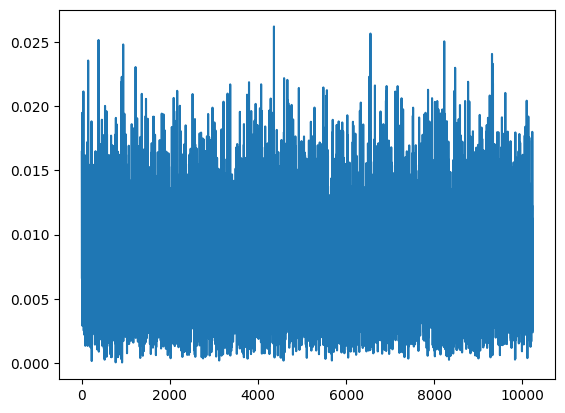

In [1]:
import numpy as np
from rtlsdr import *
from scipy import signal
from matplotlib import pyplot as plt


sdr = RtlSdr()
sdr.sample_rate = 2.048e6
sdr.center_freq = 90.9e6 
freq_offset = -0.1e6
sdr.gain = 42.1
sample_rate = 2.048e6

samples=sdr.read_samples(1.024e6)
sdr.close()

t = np.arange(len(samples))/sample_rate
samples = samples * np.exp(2j*np.pi*t*freq_offset)
h = signal.firwin(501, 0.02, pass_zero=True)
samples = np.convolve(samples, h, 'valid')
samples = samples[::100]
sample_rate = sample_rate/100
samples = np.abs(samples)
plt.plot(samples)
print(np.mean(samples))
# inspectrum



